## Questão 1. (1 ponto)

Nesta lista utilizaremos um dataset conhecido, o Pima Indians Diabetes Dataset.



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)




### A) Complete a variável 'K' com valores 'k' condizentes para o KNN.

### B) Adicione, nas listas de treino e teste, as acurácias do modelo knn treinado. Vide documentação para obter a acurácia.

* Obs: utilizar X_train, y_train para acurácia do treino e X_test e y_test para acurácia do teste.


Para mais informações:
[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

K = 16 # Complete vide "A)"
accuracy_training = []
accuracy_testing  = []
wcss = []

for i in range(1,K):
  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(X_train, y_train)

  # Complete vide "B)"
  accuracy_training.append(knn.score(X_train, y_train))
  accuracy_testing.append(knn.score(X_test, y_test))

### C) Gere um plot com a acurácia dos dados de treinamento e outro com os dados de teste. Os eixos devem ser compostos da maneira a seguir:
* Eixo x: valores de k
* Eixo y: valores da acurácia

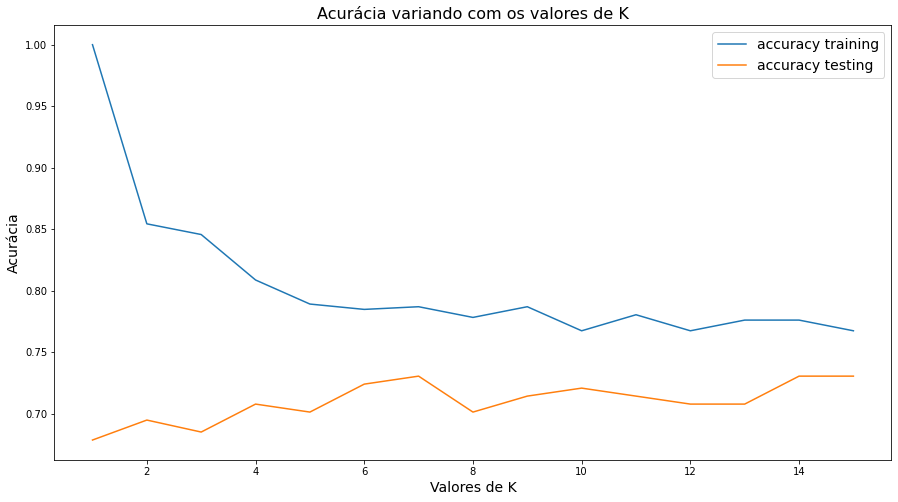

In [ ]:
# Complete com o que foi solicitado acima
plt.figure(figsize=(15,8))

plt.title('Acurácia variando com os valores de K', fontsize=16)
plt.plot(list(range(1,K)), accuracy_training, label='accuracy training')
plt.plot(list(range(1,K)), accuracy_testing, label='accuracy testing')
plt.xlabel("Valores de K", fontsize=14)
plt.ylabel("Acurácia", fontsize=14)
plt.legend(prop={'size': 14})
plt.show()

## Questão 2. (0,5 ponto)


### A) Avaliando a questão anterior, como pode ser definido um bom valor de k para o modelo?

In [ ]:
# Iremos avaliar através do método de hold-out, no qual o melhor valor de K será aquele que gere o modelo com a acurácia mais alta
best_k = accuracy_testing.index(max(accuracy_testing)) + 1
best_k

7

### B) Discorra sobre o valor de k = 1 em modelos de KNN.

Para o caso de K=1, o modelo irá prever exatamente os valores reais por agrupar cada valor individualmente, perdendo a ideia de agrupar um conjunto de dados de características semelhantes.

### C) Descreva uma justificativa para o uso de KNN como modelo preditivo nesse dataset.

Nesse dataset, podemos criar grupos com características semelhantes que resultem em uma classificação específica. Como estamos analisando atributos importantes na classificação da diabetes, o KNN é uma boa escolha para a detecção de diabéticos em um conjunto de dados.

## Questão 3. (1 ponto)
### Com o mesmo código da questão anterior, adapte-o para utilizar o modelo preditivo do Naive Bayes. Em seguida, compare os resultados, avaliando os *scores* de cada tipo de modelo Naive Bayes.

### Para mais informações:
* [sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.score)
* [sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
* [sklearn.naive_bayes.BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

* OBS: Lembrar de mudar os parâmetros das funções para um possível melhor resultado.

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Complete conforme pedido acima
clf = GaussianNB()
clf.fit(X_train, y_train)
score_clf = clf.score(X_test,y_test)

mNB = MultinomialNB()
mNB.fit(X_train, y_train)
score_mNB = mNB.score(X_test,y_test)

bNB = BernoulliNB()
bNB.fit(X_train, y_train)
score_bNB = bNB.score(X_test,y_test)

print(f"Acurácia para o modelo GaussianNB: {score_clf}")
print(f"Acurácia para o modelo MultinomialNB: {score_mNB}")
print(f"Acurácia para o modelo BernoulliNB: {score_bNB}")

Acurácia para o modelo GaussianNB: 0.7337662337662337
Acurácia para o modelo MultinomialNB: 0.5811688311688312
Acurácia para o modelo BernoulliNB: 0.6396103896103896


## Questão 4. (1 ponto)


### A) Descreva se teve alguma mudança significativa na comparação dos modelos preditivos, tanto entre tipos de Naive Bayes, quanto entre Naive Bayes e KNN.

É notório que os modelos Multinomial e Bernoulli apresentaram desempenho inferior em comparação com os demais modelos de Naive Bayes e com os modelos KNN. Além disso, a acurácia do modelo Gaussiano não apresentou mudanças significativas em relação aos resultados obtidos pelo KNN. Entre todos os modelos de classificação testados, o KNN se mostrou o mais eficiente.

### B) Cite algum caso específico em que Naive Bayes pode ser mais vantajoso do que KNN e vice-versa.

Naive Bayes pode ser mais vantajoso do que KNN em casos onde temos muitas variáveis independentes (features) e poucos dados, como por exemplo na classificação de texto, onde as variáveis independentes são palavras ou termos e o número de palavras é grande.

Já o KNN pode ser mais vantajoso do que Naive Bayes em casos onde a relação entre as variáveis independentes e a variável dependente é complexa e não-linear, como por exemplo na classificação de imagens, onde a relação entre as variáveis independentes e a variável dependente é complexa e não-linear.



## Questão 5. (1 ponto)

## Avalie a base de dados de Pima Indians Diabetes pela acurácia, utilizando Regressão Linear e Regressão Logística.

* Obs: Lembrar de mudar os parâmetros para ser compatível com as regressões respectivas.


In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Criar modelo de Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)

# Avaliar desempenho do modelo de Regressão Linear
lr_accuracy = lr.score(X_test,y_test)
lr_accuracy

0.2818848560387851

In [ ]:
# Criar modelo de Regressão Logística

logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

# Avaliar desempenho do modelo de Regressão Logística
logreg_accuracy = logreg.score(X_test,y_test)
logreg_accuracy

0.7402597402597403

## Questão 6 (0,5 ponto).

### A) Explique como o fitting da Regressão Logística se diferencia da Regressão Linear.

O processo de ajuste (*fitting*) da regressão linear e da regressão logística também difere em termos de como a função de perda é definida e como os parâmetros do modelo são estimados. Na regressão linear, o objetivo é minimizar o erro pela soma dos quadrados, resultando em uma equação linear que pode ser usada para prever valores contínuos para uma variável dependente, dadas as variáveis independentes. Por outro lado, na regressão logística, o objetivo é minimizar a função de perda de entropia cruzada (*cross-entropy loss*) para estimar os parâmetros do modelo.

### B) Em quais contextos a Regressão Logística é preferível de se utilizar do que a Linear?

Quando estamos interessados em prever a probabilidade de um evento categórico binário, como a probabilidade de um paciente ter uma doença ou não (como no exemplo que estamos trabalhando), a probabilidade de um e-mail ser spam ou não spam, entre outros exemplos.

## Questão 7. (0,5 ponto)
## Analise a árvore abaixo e utilize-a para explicar as propriedades do problema.

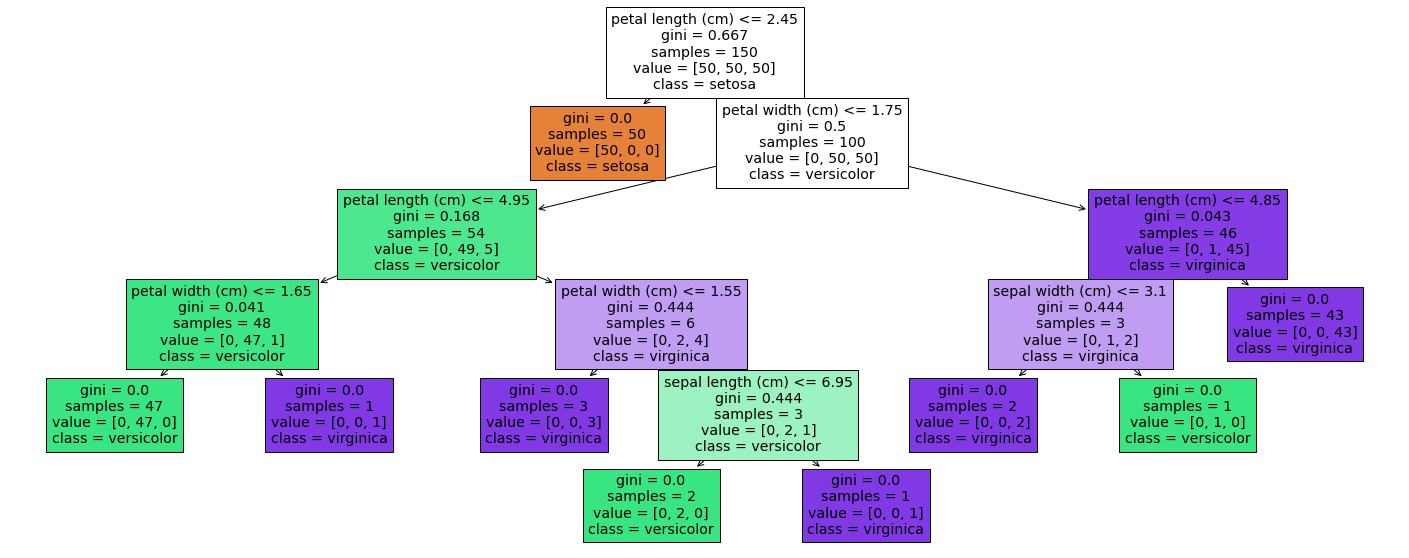

In [2]:
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 

iris = datasets.load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

No exemplo acima podemos analisar quais as condições para uma tomada de decisão de um algoritmo. Essa árvore de classificação é composta por nós, definidos pelas condições de classificação, e das folhas, correspondentes a classificação final dos dados.

## Questão 8. (0,5 ponto)
## Analise o gráfico da importância que a árvore dá para cada feature e retire insights sobre fatores de riscos da diabetes.


Feature: 0, Score: 0.06736
Feature: 1, Score: 0.31268
Feature: 2, Score: 0.07667
Feature: 3, Score: 0.01622
Feature: 4, Score: 0.04721
Feature: 5, Score: 0.22138
Feature: 6, Score: 0.13162
Feature: 7, Score: 0.12687


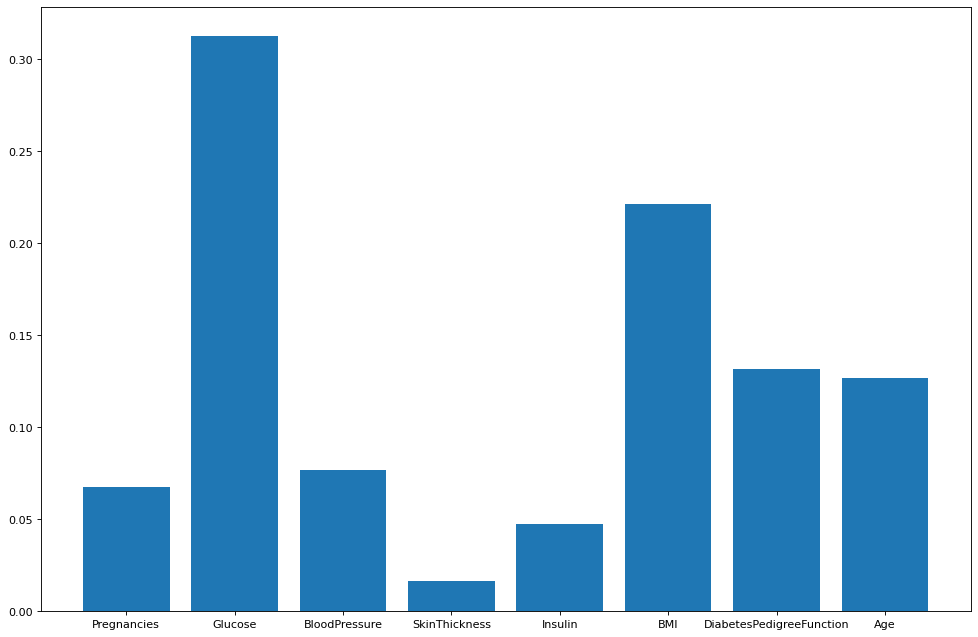

In [3]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

df = pd.read_csv("diabetes.csv")
X = df[df.columns[:-1]].values
y = df['Outcome'].values

model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.figure(figsize=(15, 10), dpi=80)
pyplot.bar(df.columns[:-1], importance)
pyplot.show()

De acordo com o valor do score, podemos analisar a importância de uma feature na árvore de decisão utilizada no algoritmo. Portanto, podemos concluir que a informação sobre a glicose no sangue ser o atributo mais importante na classificação da diabetes, enquanto a *SkinThickness* se encontra como o atributo menos relevante para o algoritmo em estudo.

## Questão 9. (1 ponto)
## Explique o problema XOR e o perceptron clássico e a importância de ambos para o desenvolvimento da área de redes neurais.


O problema XOR é um problema de classificação não linear que não pode ser resolvido por um único neurônio perceptron. O perceptron clássico é um modelo de rede neural artificial que pode ser treinado para resolver problemas de classificação linear, mas não é capaz de resolver problemas de classificação não linear como o problema XOR.

A impossibilidade de resolver o problema XOR com um único perceptron clássico mostrou a necessidade de modelos de redes neurais mais complexos para resolver problemas de classificação não lineares. Isso levou ao desenvolvimento de modelos de redes neurais mais avançados, como redes neurais multilayer perceptron e redes neurais convolucionais, que são capazes de resolver problemas de classificação não linear mais complexos.

## Questão 10 (3 pontos).
 


### A) Complete o código abaixo criando 4 classificadores. Sendo eles um perceptron clássico e os outros 3 sendo multilayer perceptrons. Para cada um dos multilayer perceptron, escolha um valor diferente para os seguintes atributos:

*   Camadas ocultas;
*   Função de ativação;
*   Otimizador.

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_digits(return_X_y=True)

In [13]:
# Perceptron Clássico
perceptron = Perceptron()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Acurácia do Perceptron Clássico:", round(accuracy_perceptron,5))

Acurácia do Perceptron Clássico: 0.94444


In [14]:
# Multilayer Perceptron 1
mlp1 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
mlp1.fit(X_train, y_train)
y_pred_mlp1 = mlp1.predict(X_test)
accuracy_mlp1 = accuracy_score(y_test, y_pred_mlp1)
print("Acurácia do MLP 1:", round(accuracy_mlp1,5))

Acurácia do MLP 1: 0.92778


In [15]:
# Multilayer Perceptron 2
mlp2 = MLPClassifier(hidden_layer_sizes=(50, 10), activation='logistic', solver='lbfgs')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
mlp2.fit(X_train, y_train)
y_pred_mlp2 = mlp2.predict(X_test)
accuracy_mlp2 = accuracy_score(y_test, y_pred_mlp2)
print("Acurácia do MLP 2:", round(accuracy_mlp2,5))

Acurácia do MLP 2: 0.92593


In [16]:
# Multilayer Perceptron 3
mlp3 = MLPClassifier(hidden_layer_sizes=(100, 50, 10), activation='tanh', solver='sgd')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
mlp3.fit(X_train, y_train)
y_pred_mlp3 = mlp3.predict(X_test)
accuracy_mlp3 = accuracy_score(y_test, y_pred_mlp3)
print("Acurácia do MLP 3:", round(accuracy_mlp3,5))

Acurácia do MLP 3: 0.94074


### B) Escolha um método de avaliação para os classificadores e compare o desempenho de cada um.

Links úteis:
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [21]:
# Calculado anteriormente
# Resultados
print("Acurácia do Perceptron Clássico:", round(accuracy_perceptron,5))
print("Acurácia do MLP 1:", round(accuracy_mlp1,5))
print("Acurácia do MLP 2:", round(accuracy_mlp2,5))
print("Acurácia do MLP 3:", round(accuracy_mlp3,5))

Acurácia do Perceptron Clássico: 0.94444
Acurácia do MLP 1: 0.92778
Acurácia do MLP 2: 0.92593
Acurácia do MLP 3: 0.94074
